In [1]:
# les importations
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# importation de la dataset
df = pd.read_csv('scorm_tracking_copy.csv', delimiter=';')

# Partie 1:

A partir du jeu de données original, créer:
- un Dataframe comportant tous les modules en précisant l’effectif des
apprenants, le nombre total de sessions, le score maximal, le score minimal,
le taux de réussite (pour les apprenants des scores > 50)
- un tableau 2D Numpy avec les données des 10 tops modules selon les taux
de réussites (Chaque ligne représente un module)

In [3]:
# calcule de l'effectif des apprenants pour chaque module, en faisant attention parce que les apprenants peuvent se répeter
effectif_apprenant = df.groupby("object_id").actor.nunique()
#effectif_apprenant # effectif des apprenants

In [4]:
# calcule du nombre total de session pour chaque module
nombre_total_session = df.groupby("object_id").session_uuid.count()
#nombre_total_session # nombre total de session

In [5]:
# calcule du score maximal pour chaque module
score_max = df.groupby("object_id").score.max()
#score_max # score maximal

In [6]:
# calcule du score minimal pour chaque module
score_min = df.groupby("object_id").score.min()
#score_min # score minimal

In [7]:
# calcule du nombre d'apprenant pour chaque module dont le score est >=50
# taux de ressite = (nombre_eleve_plus_de_50 x 100) / effective_apprenant
nombre_apprenant_admis = df.loc[df.score>=50].groupby("object_id").actor.nunique()
#nombre_apprenant_admis

In [8]:
# creation de mon data frame final

my_dict = {"effectif": effectif_apprenant, "nombre_total_session": nombre_total_session, "score_max": score_max, "score_min": score_min, "taux_de_reussite": (nombre_apprenant_admis*100)/effectif_apprenant}
df_tp2 = pd.DataFrame(my_dict)
#df_tp2.dropna(axis=0, inplace = True) # supprime les NaN dans le data frame
df_tp2.replace(np.nan, 0, inplace=True)
df_tp2

,effectif,nombre_total_session,score_max,score_min,taux_de_reussite
object_id,,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
671-presentation,340,634,100.0,0.0,90.588235
674-strategie-et-croissance,327,471,100.0,0.0,91.131498
677-affaires-medicales,322,469,100.0,0.0,91.614907
...,...,...,...,...,...
824-nescens,12,22,0.0,0.0,0.000000
825-die-dienstleistungen-f-r-den-patienten,61,156,100.0,0.0,91.803279
826-i-servizi-ai-pazienti,12,35,100.0,0.0,83.333333


In [9]:
# le data frame contenat les top 10
top_10 = df_tp2.sort_values(by='taux_de_reussite', ascending=False).head(10)
#top_10

In [11]:
# conversion du data frame en tableau numpy
np_array = np.array(top_10)
#np_array

# Partie 2:

Pour le top module et le dernier:
- créer un Dataframe avec les données résumées de chaque apprenants:
nombre total de sessions, nombre total de temps, score, resultat final (de
valeur 0 si score < 50 et 1 sinon)

In [12]:
# determination du nom du top module
taux_max = max(top_10.taux_de_reussite)
top_module = top_10.loc[top_10.taux_de_reussite == taux_max]
name_top_module = top_module.index[0]
name_top_module # le nom du premier module des tops 10

'752-etudes-de-cas-et-questions'

In [13]:
# determination du nom du dernier module
taux_min = min(top_10.taux_de_reussite)
dernier_module = top_10.loc[top_10.taux_de_reussite == taux_min]
#dernier_module
name_dernier_module = dernier_module.index[0]
name_dernier_module # les nom des dernier module des tops 10

'736-conge-non-paye'

## Pour le top module:

In [22]:
# le data frame dont le nom de module correspond au nom du top module trié par un nombre précis de champ voulue
df_tm = df.loc[df.object_id == name_top_module, ["actor","session_uuid","object_id","score","temps"]]
df_tm

,actor,session_uuid,object_id,score,temps
5928,ga2018_6tje@yopmail.com,ffa98e31-344e-4db7-b1e9-eac2604e8309,752-etudes-de-cas-et-questions,100.0,1347.0
6582,ga2018_fg3a@yopmail.com,5ccb316f-1a69-4adc-bca3-02cb7d19d0f9,752-etudes-de-cas-et-questions,100.0,305.0
6796,ga2018_r0eg@yopmail.com,888a1a0b-42df-4b14-8f4b-e22e78c0887b,752-etudes-de-cas-et-questions,0.0,636.0
6804,ga2018_r0eg@yopmail.com,4110fc2f-06c2-481f-bd24-ccba115f39c4,752-etudes-de-cas-et-questions,100.0,94.0
7340,ga2018_ay6r@yopmail.com,bdc8598c-09d0-4773-bf50-b5183c860320,752-etudes-de-cas-et-questions,67.0,318.0
...,...,...,...,...,...
24529,ga2018_u53p@yopmail.com,2723c65b-8c84-4e1a-b61a-b70e51921f9f,752-etudes-de-cas-et-questions,83.0,478.0
24562,ga2018_pzi6@yopmail.com,ab40c727-4057-4875-8d0a-af2664673f4f,752-etudes-de-cas-et-questions,83.0,212.0
25651,ga2018_xa9k@yopmail.com,1aaf3399-1e4f-4174-9840-ffea7a78cbc9,752-etudes-de-cas-et-questions,83.0,497.0
25652,ga2018_xa9k@yopmail.com,79d5831d-d1cb-439d-8750-b4fefcafb15a,752-etudes-de-cas-et-questions,0.0,4.0


In [15]:
# calcul du nombre total de session pour le top module regrouper par apprenant
nbre_total_session_tm = df_tm.groupby("actor").session_uuid.nunique()
#nbre_total_session_tm

In [16]:
# calcul du nombre total de temps pour le top module régroupé par apprenant
nbre_total_temps_tm = df_tm.groupby("actor").temps.sum()
#nbre_total_temps_tm

In [17]:
# calcul du score maximal pour le top modul régroupé par apprenant
score_tm = df_tm.groupby("actor").score.max()
#score_tm

In [18]:
# fonction permettant de retourner 0 ou 1 en fonction de la valeur donnée comme paramettre
def resultat(value):
    ''' 
        retourne 0 ou 1 en fonction de la valeur donnée en paramettre
        param: entier
        retour: 0 ou 1
    '''
    if value >=50:
        return 1
    else:
        return 0

In [19]:
# calcul de la colonne pour le résultat final (1 si score>= et 0 sinon)
resultat_final_tm = score_tm.map(lambda x: resultat(x)) # la fonction joue sur les Series
#resultat_final_tm

In [21]:
# creation du data frame final à partir des données precedemment calculer
top_module_dict = {"nbre_total_session": nbre_total_session_tm, "nbre_total_temps": nbre_total_temps_tm, "score": score_tm, "resultat":resultat_final_tm}
df_top_modul = pd.DataFrame(top_module_dict)
df_top_modul

,nbre_total_session,nbre_total_temps,score,resultat
actor,,,,
dtic@mobiletic.com,4,1546.0,83.0,1
ga2018_05n7@yopmail.com,1,425.0,67.0,1
ga2018_096a@yopmail.com,4,481.0,100.0,1
ga2018_0buu@yopmail.com,1,236.0,67.0,1
ga2018_0hot@yopmail.com,1,449.0,67.0,1
...,...,...,...,...
ga2018_xovt@yopmail.com,1,316.0,50.0,1
ga2018_xsog@yopmail.com,1,380.0,83.0,1
ga2018_yap3@yopmail.com,1,686.0,100.0,1


## Pour le dernier module:

In [20]:
# la data frame dont le nom de module correspond au nom du dernier module trié par un nombre précis de champ voulue
df_dm = df.loc[df.object_id == name_dernier_module, ["actor","session_uuid","object_id","score","temps"]]
#df_dm

In [21]:
# calcul du nombre total de session pour le dernier module regrouper par apprenant
nbre_total_session_dm = df_dm.groupby("actor").session_uuid.nunique()
#nbre_total_session_dm

In [22]:
# calcul du nombre total de temps pour le dernier module régroupé par apprenant
nbre_total_temps_dm = df_dm.groupby("actor").temps.sum()
#nbre_total_temps_dm

In [23]:
# calcul du score maximal pour le dernier modul régroupé par apprenant
score_dm = df_dm.groupby("actor").score.max()
#score_dm

In [24]:
# calcul de la colonne pour le résultat final (1 si score>=50 et 0 sinon)
resultat_final_dm = score_dm.map(lambda x: resultat(x)) # la fonction joue sur les Series
#resultat_final_dm

In [25]:
# creation du data frame final à partir des données precedemment calculer
last_module_dict = {"nbre_total_session": nbre_total_session_dm, "nbre_total_temps": nbre_total_temps_dm, "score": score_dm, "resulat": resultat_final_dm}
df_last_modul = pd.DataFrame(last_module_dict)
#df_last_modul

# Partie 3: Les graphes

## Pour les 10 top module:
- Représenter par une courbe ces derniers dans un même repère sur une figure unique. A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. L’ordonné est déterminé par son score maximum.
- Un diagramme en bâton avec le taux de réussite de chaque module.


In [26]:
# fonction pour obtenir le nom d'un module precis du top 10 des module
def get_module_name(index):
    return top_10.index[index]

In [27]:
# fonction pour obtenir le nom d'un module precis du data frame global
def get_all_module_name(index):
    return df.object_id[index]

In [28]:
# fonction pour obtenir la liste des noms des apprenants d'un module precis
def get_list_learner_names(module_name):
    learners_from_module = df.loc[df.object_id == module_name, ["object_id","actor"]]
    learner_names = learners_from_module.groupby("object_id").actor.unique().values
    return learner_names

In [29]:
def get_df_leaner_for_module(name_of_learner, module_name):
     # obtention d'un data frame contenant la liste des score et leur temps pour un apprenant precis dans un module precis
    df_learner = df[["actor", "object_id", "score", "temps"]].where((df.actor == name_of_learner) & (df.object_id == module_name)).dropna(axis=0)
    return df_learner


In [30]:
# fonction pour obtenit le score maximal pour un apprenant dans un module precis
def get_score_max(df_learner):
    # obtention du score maximal
    score_max = df_learner["score"].max()
    return score_max

In [31]:
# fonction pour obtenir le data frame contenant uniquement le score maximal avec les differents temps
def get_df_score_max(df_learner, score_max):
    # obtention du data frame contenant uniquement le score maximal avec les differents temps
    df_score_max = df_learner.loc[df_learner.score == score_max]
    return df_score_max

In [32]:
# fonction pour obtenir le temps minimal pour un score maximal donnée
def get_time_min(df_score_max):
    # obtention du temps minimal
    time_series = df_score_max.groupby("score").temps.min()
    time_min = time_series.values[0]/60
    return time_min

In [33]:
# fonction pour obtenir le total des temps d'un apprenant dans un module
def get_total_time(df_learner):
    total_time = df_learner["temps"].sum()
    return total_time

In [34]:
# fonction pour obtenir le data frame des scores maximal et des temps minimal correspondant par apprenants pour un module precis
def get_df_score_time_for_module(index):
    score_list = []
    time_list = []
    # obtention du  nom du module,
    module_name = get_module_name(index=index)
    # obtention de la liste des apprenants d'un module precis
    learner_names = get_list_learner_names(module_name=module_name)
    # obtention du score et du temps pour un apprenant precis d'un module precis
    for i in range(len(learner_names[0])):
        df_learner = get_df_leaner_for_module(name_of_learner=learner_names[0][i], module_name=module_name)
        score_max = get_score_max(df_learner=df_learner)
        df_score_max = get_df_score_max(df_learner=df_learner, score_max=score_max)
        time_min = get_time_min(df_score_max=df_score_max)
        score_list.append(score_max)
        time_list.append(time_min)
    # creation et renvoi de notre data frame
    df_final = pd.DataFrame({"score": score_list,"temps": time_list})
    return df_final.sort_values(by=["score", "temps"], ascending=[False,True])

In [35]:
# fonction pour obtenir le data frame des scores maximal, du temps total et du rang des apprenants pour un module precis
def get_df_score_total_time_for_module(index):
    score_list = []
    time_list = []
    # obtention du  nom du module
    module_name = get_all_module_name(index=index)
    # obtention de la liste des apprenants d'un module precis
    learner_names = get_list_learner_names(module_name=module_name)
    # obtention du score et du temps pour un apprenant precis d'un module precis
    for i in range(len(learner_names[0])):
        df_learner = get_df_leaner_for_module(name_of_learner=learner_names[0][i], module_name=module_name)
        score_max = get_score_max(df_learner=df_learner)
        total_time = get_total_time(df_learner=df_learner)
        score_list.append(score_max)
        time_list.append(total_time)
    # creation et renvoi de notre data frame
    df_final = pd.DataFrame({"score_max": score_list,"temps_total": time_list})
    df_final.sort_values(by=["score_max", "temps_total"], ascending=[False, True], inplace=True)
    df_final["rang"] = [i+1 for i in range(len(df_final))]
    return df_final

In [36]:
top_module_0 = get_df_score_time_for_module(0)
top_module_1 = get_df_score_time_for_module(1)
top_module_2 = get_df_score_time_for_module(2)
top_module_3 = get_df_score_time_for_module(3)
top_module_4 = get_df_score_time_for_module(4)
top_module_5 = get_df_score_time_for_module(5)
top_module_6 = get_df_score_time_for_module(6)
top_module_7 = get_df_score_time_for_module(7)
top_module_8 = get_df_score_time_for_module(8)
top_module_9 = get_df_score_time_for_module(9)

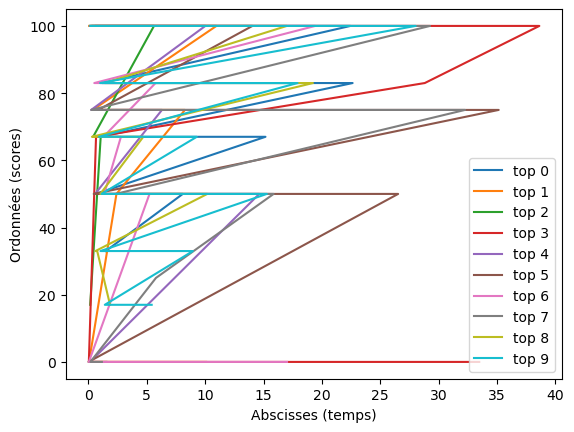

In [37]:
def courbe():
    fig, ax = plt.subplots()
    for i in range(10):
        ax.plot(get_df_score_time_for_module(i)["temps"], get_df_score_time_for_module(i)["score"], label='top {}'.format(i))
    
    ax.set_xlabel("Abscisses (temps)")
    ax.set_ylabel("Ordonnées (scores)")
    ax.legend()

    plt.show()
    
courbe()

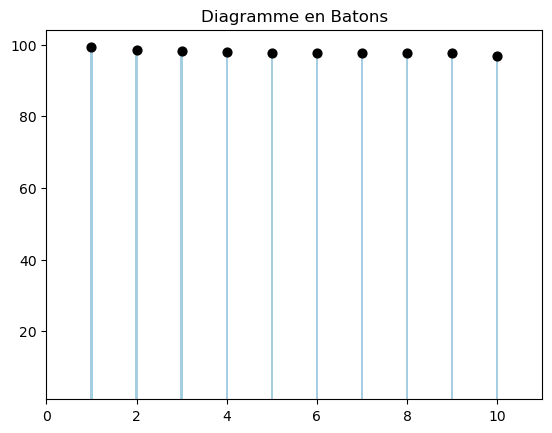

In [38]:
# le positionnement par rapport à l'axe des abscisses
x = [1,2,3,4,5,6,7,8,9,10]
# le positionnement par rapport à l'axe des ordonnées
height = top_10["taux_de_reussite"]
# la largeur de chaque bar
width = 0.05

# reglage sur les bars
plt.bar(x, height, width, color=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1))
# le reglage des point noir sur le bout des bars
plt.scatter(x,height,color='k',s=40)

# xlim determine la valeur maximal de la graduation. Si c'est 0.11 allors la valeur maximal est 11
plt.xlim(0,11)
# ylim determine la valeur maximal de la graduation. Si c'est 0.14 allors la valeur maximal est 14
plt.ylim(1)
plt.title('Diagramme en Batons')

plt.show()

## Pour les 3 top module:
Représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois.
A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. 
L’ordonné est déterminé par son score maximum.

In [39]:
df_top_3 = top_10.head(3)

In [40]:
top_module_0["rang"] = [i+1 for i in range(len(top_module_0))]
top_module_1["rang"] = [i+1 for i in range(len(top_module_1))]
top_module_2["rang"] = [i+1 for i in range(len(top_module_2))]

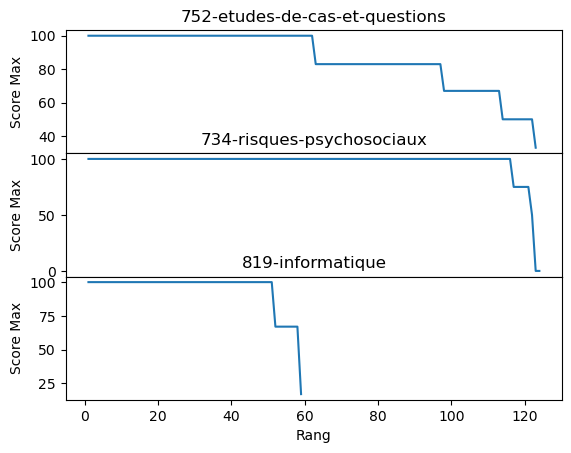

In [41]:
fig, ax = plt.subplots(3, 1,sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].plot(top_module_0["rang"], top_module_0["score"])
ax[1].plot(top_module_1["rang"], top_module_1["score"])
ax[2].plot(top_module_2["rang"], top_module_2["score"])

ax[0].set_xlabel("Rang")
ax[1].set_xlabel("Rang")
ax[2].set_xlabel("Rang")

ax[0].set_ylabel("Score Max")
ax[1].set_ylabel("Score Max")
ax[2].set_ylabel("Score Max")

ax[0].set_title(df_top_3.index[0]);
ax[1].set_title(df_top_3.index[1]);
ax[2].set_title(df_top_3.index[2]);

# Pour tous les modules:
- Représenter l’ensemble par un nuage de points dans un même repère sur une même figure. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.
- Un camembert avec le taux des modules catégorisés en quatre classes: 
    - Classe A: taux de réussite > = 80%
    - Classe B: taux de réussite > = 60%
    - Classe C: taux de réussite > = 50%
    - Classe D: taux de réussite < 50%


In [42]:
df_p3 = df[["id", "actor", "object_id", "score", "temps"]]
name_all_module = df_p3.groupby("object_id").object_id.unique().index
total_time_module = df_p3.groupby("object_id").temps.sum()
score_max_module = df_p3.groupby("object_id").score.max()

df_scatter = pd.DataFrame({"score_max": score_max_module, "temps_total": total_time_module/60})
df_scatter.sort_values(by=["score_max", "temps_total"], ascending=[False, True], inplace=True)
df_scatter["rang"] = [i+1 for i in range(len(df_scatter))]

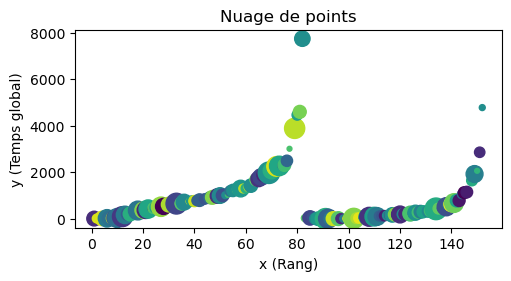

In [43]:
data = {'x':df_scatter["rang"],
        'c': np.random.randint(0, 50, len(df_scatter)),
        'd': np.random.randn(len(df_scatter))}
data['y'] = df_scatter["temps_total"]
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('x', 'y', c='c', s='d', data=data)

plt.title('Nuage de points')
plt.xlabel('x (Rang)')
plt.ylabel('y (Temps global)');

In [44]:
df_camembert = df_tp2.copy()
df_camembert["classe"] = "A"
df_camembert.loc[(df_camembert["taux_de_reussite"]>=80), 'classe'] = 'A'
df_camembert.loc[(df_camembert["taux_de_reussite"]<80) & (df_camembert["taux_de_reussite"]>=60), 'classe'] = 'B'
df_camembert.loc[(df_camembert["taux_de_reussite"]<60) & (df_camembert["taux_de_reussite"]>=50), 'classe'] = 'C'
df_camembert.loc[(df_camembert["taux_de_reussite"]<50), 'classe'] = 'D'

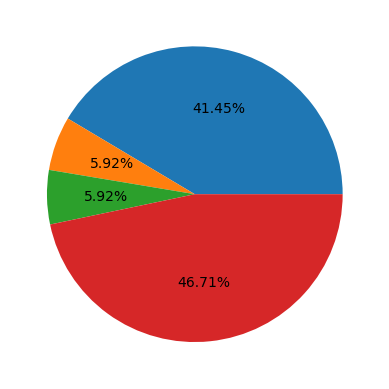

In [45]:
data_pie = df_camembert.groupby("classe").classe.count()
plt.pie(data_pie, autopct = '%1.2f%%');
plt.show()